<a href="https://colab.research.google.com/github/riyabhatnagar021/Kaggle_Walmart_Sales_Challange/blob/master/Walmart_sales_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile
zer=zipfile.ZipFile('drive/My Drive/project_data/features.zip','r')
zer.extractall()
zer.close()

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
f=pd.read_csv('features.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
s=pd.read_csv('stores.csv')


In [5]:
train.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.5,False


In [6]:
f.head(1)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [7]:
s.head(1)

,Store,Type,Size
0,1,A,151315


In [0]:
data=train.merge(s,how='left').merge(f,how='left')

In [0]:
check=test.merge(f,how='left').merge(s,how='left')

In [10]:
data.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.5,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [11]:
data.shape

(421570, 16)

In [12]:
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [0]:
data['MarkDown1']=data['MarkDown1'].fillna(0)

In [0]:
data['MarkDown1'].isnull().sum()

0

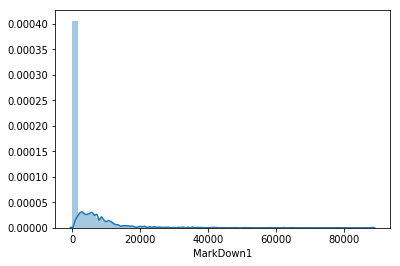

In [0]:
sns.distplot(data['MarkDown1'])

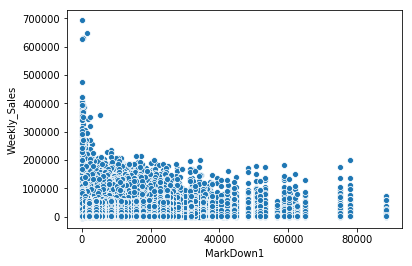

In [0]:
sns.scatterplot(data['MarkDown1'],data['Weekly_Sales'])

In [0]:
(data['MarkDown1']>80000).value_counts()

False    423252
True         73
Name: MarkDown1, dtype: int64

In [0]:
data['MarkDown2']=data['MarkDown2'].fillna(0)

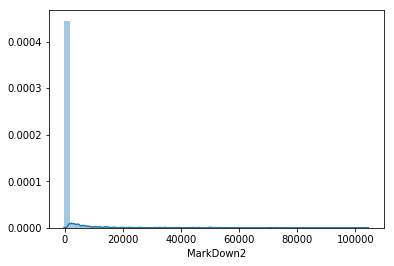

In [0]:
sns.distplot(data['MarkDown2'])

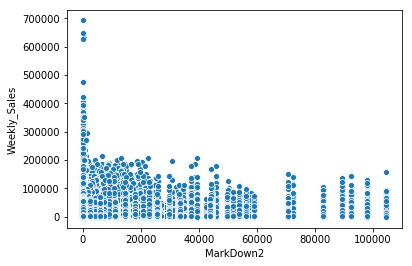

In [0]:
sns.scatterplot(data['MarkDown2'],data['Weekly_Sales'])

In [0]:
data['MarkDown3']=data['MarkDown3'].fillna(0)

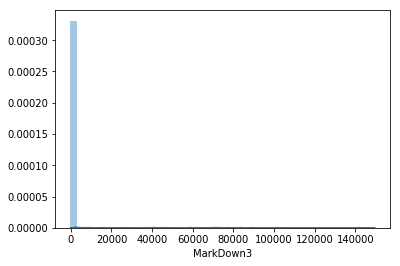

In [0]:
sns.distplot(data['MarkDown3'])

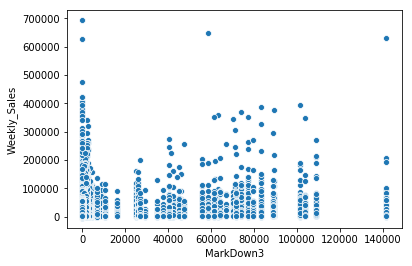

In [0]:
sns.scatterplot(data['MarkDown3'],data['Weekly_Sales'])

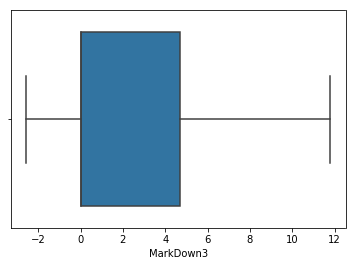

In [0]:
sns.boxplot(data['MarkDown3'],showfliers=False)

In [0]:
(data['MarkDown3']>120000).value_counts()

False    423247
True         78
Name: MarkDown3, dtype: int64

In [0]:
data['MarkDown4']=data['MarkDown4'].fillna(0)

In [0]:

data['MarkDown5']=data['MarkDown5'].fillna(0)

In [0]:
data.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size', 'Dept', 'Weekly_Sales'],
      dtype='object')

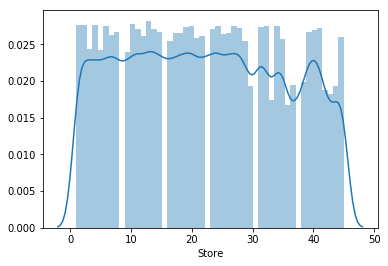

In [0]:
sns.distplot(data['Store'])

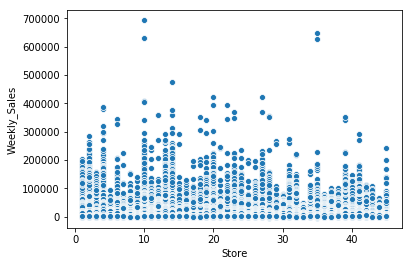

In [0]:
sns.scatterplot(data['Store'],data['Weekly_Sales'])

In [0]:
import time
col=['Date']
for c in col:
  data[c]=pd.to_datetime(data[c])
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month

data['Dat']=data['Date'].dt.day





In [0]:
data.drop('Date',axis=1,inplace=True)


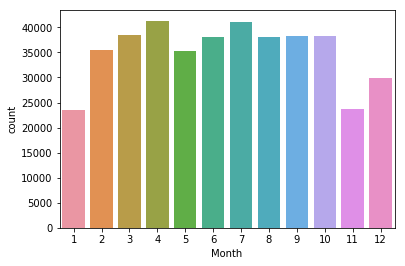

In [0]:
sns.countplot(data['Month'])

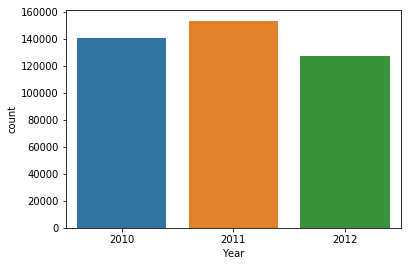

In [0]:
sns.countplot(data['Year'])

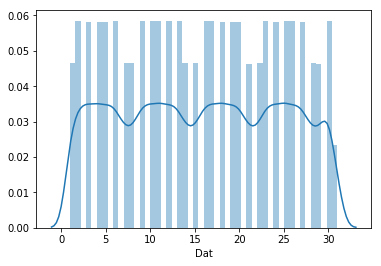

In [0]:
sns.distplot(data['Dat'])

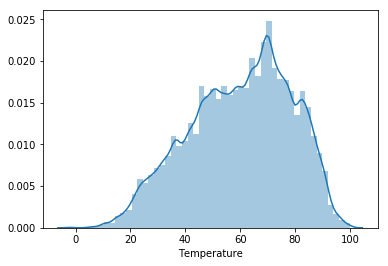

In [0]:
sns.distplot(data['Temperature'])

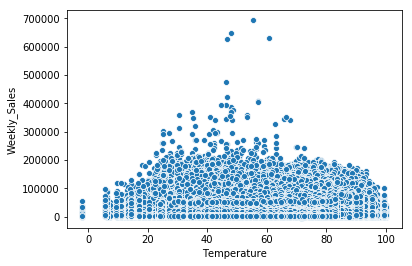

In [0]:
sns.scatterplot(data['Temperature'],data['Weekly_Sales'])

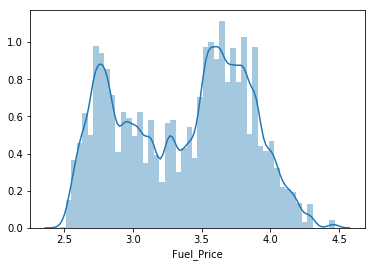

In [0]:
sns.distplot(data['Fuel_Price'])

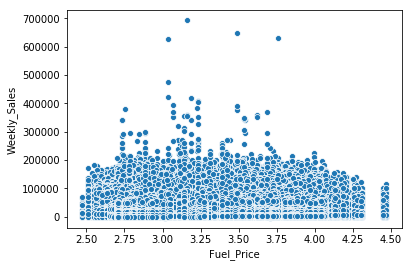

In [0]:
sns.scatterplot(data['Fuel_Price'],data['Weekly_Sales'])

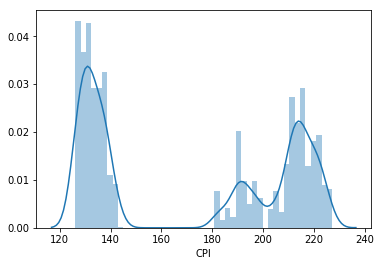

In [0]:
sns.distplot(data['CPI'])


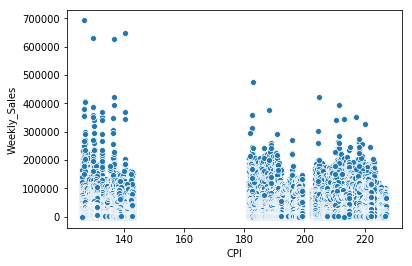

In [0]:
sns.scatterplot(data['CPI'],data['Weekly_Sales'])

In [0]:
data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month',
       'Dat'],
      dtype='object')

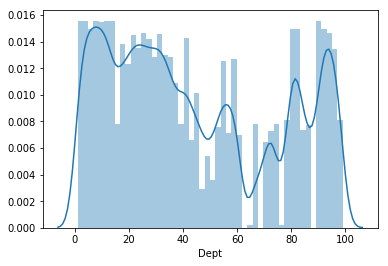

In [0]:
sns.distplot(data['Dept'])

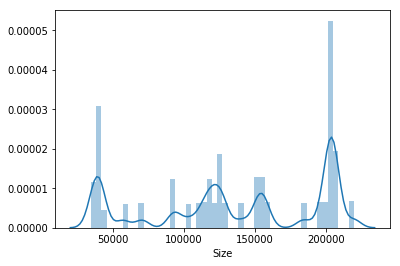

In [0]:
sns.distplot(data['Size'])

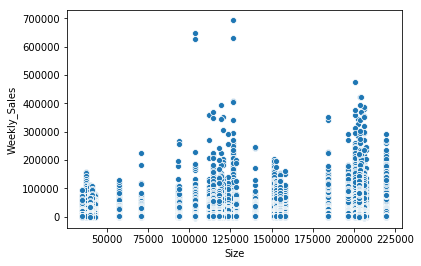

In [0]:
sns.scatterplot(data['Size'],data['Weekly_Sales'])

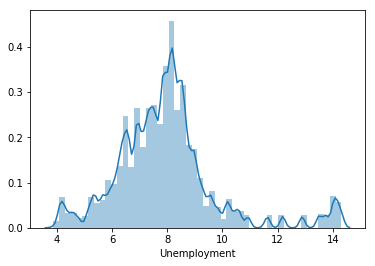

In [0]:
sns.distplot(data['Unemployment'])

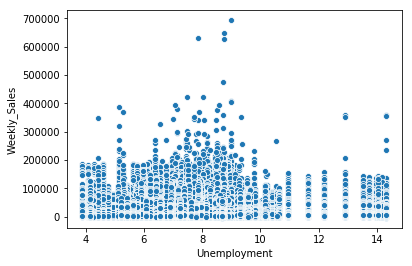

In [0]:
sns.scatterplot(data['Unemployment'],data['Weekly_Sales'])

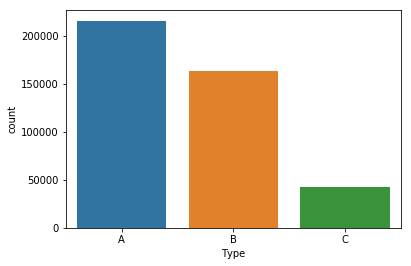

In [0]:
sns.countplot(data['Type'])

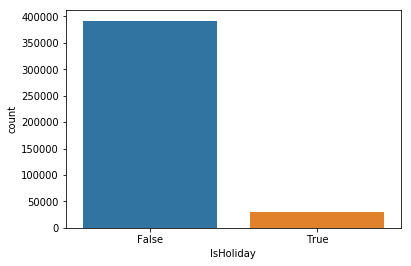

In [0]:
sns.countplot(data['IsHoliday'])

In [20]:
data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month',
       'Dat'],
      dtype='object')

In [0]:
cat=pd.DataFrame()
cat['Type']=data['Type']
cat['IsHoliday']=data['IsHoliday']

In [0]:
num=pd.DataFrame()
num=data
num.drop(['Type','IsHoliday'],axis=1,inplace=True)

In [0]:
# cdata['type']

In [0]:
type_new=pd.get_dummies(cat['Type'],prefix='Type')
is_new=pd.get_dummies(cat['IsHoliday'],prefix='IsHoliday')

In [0]:
type_new.head()

,Type_A,Type_B,Type_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [0]:
# new_Year=pd.get_dummies(num['Year'],prefix='Year')

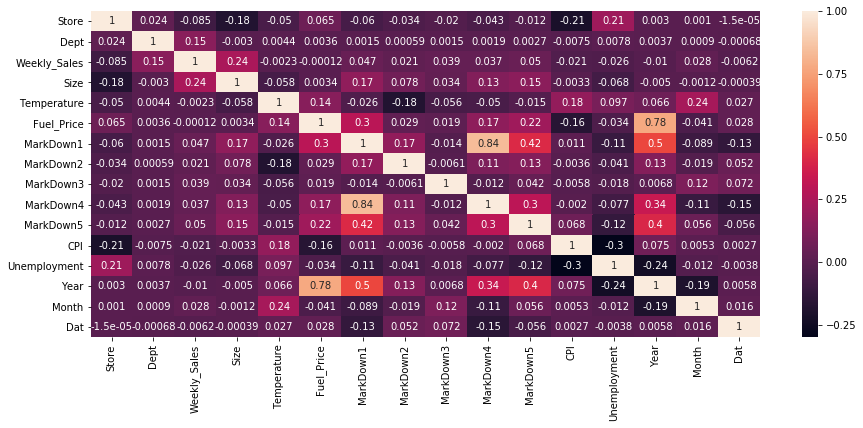

In [24]:
plt.figure(figsize=(15,6))
corr=num.corr()
sns.heatmap(corr,annot=True)

MarkDown1 and MarkDown4 are 84% corelated, so we can drop any one of them. 
CPI has wide gap in scatter plot so remove it and Unemployment seems useless as well

In [0]:
new_data=pd.concat([type_new,is_new,num,cat],axis=1)

In [0]:
new_data.drop(['Type','IsHoliday'],axis=1,inplace=True)

CPI has wide gap in scatter plot so remove it and Unemployment seems useless as well

In [0]:
new_data.drop(['Unemployment','CPI','MarkDown4'],axis=1,inplace=True)

In [28]:
new_data.shape

(421570, 18)

In [0]:
from sklearn.linear_model import LinearRegression


In [30]:
check.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size'],
      dtype='object')

In [0]:
y=new_data['Weekly_Sales']

In [0]:
new_data.drop('Weekly_Sales',axis=1,inplace=True)

In [33]:
new_data.columns

Index(['Type_A', 'Type_B', 'Type_C', 'IsHoliday_False', 'IsHoliday_True',
       'Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown5', 'Year', 'Month', 'Dat'],
      dtype='object')

In [0]:
X=new_data

In [35]:
X.shape

(421570, 17)

In [36]:
y.shape

(421570,)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [40]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.08482676456125982

In [0]:
# y_test

In [41]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
from sklearn import metrics 

In [46]:
print('Accuracy',rfr.score(X_test,y_test))
y_pred=rfr.predict(X_test)


Accuracy 0.9732375254545725


In [48]:
from xgboost import XGBRegressor
mod=XGBRegressor()
mod.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [49]:
print('Accuracy',mod.score(X_test,y_test))
y_pred=mod.predict(X_test)


Accuracy 0.7341126390063031


In [54]:
etr=ExtraTreesRegressor()
etr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [55]:
print('Accuracy',etr.score(X_test,y_test))
y_pred=etr.predict(X_test)


Accuracy 0.9742768577469553


In [52]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
print('Accuracy',gbr.score(X_test,y_test))
y_pred=gbr.predict(X_test)


Accuracy 0.7354662215689224


In [0]:
check.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64

In [0]:
check['MarkDown1']=check['MarkDown1'].fillna(0)

In [0]:
check['MarkDown2']=check['MarkDown2'].fillna(0)

In [0]:
check['MarkDown3']=check['MarkDown3'].fillna(0)

In [0]:
# check['MarkDown4']=check['MarkDown4'].fillna(0)

In [0]:
check['MarkDown5']=check['MarkDown5'].fillna(0)

In [0]:
check['CPI']=check['CPI'].fillna(check['CPI'].mean())

In [0]:
check['Unemployment']=check['Unemployment'].fillna(check['Unemployment'].mean())

In [0]:
check.drop(['CPI','Unemployment','MarkDown4'],axis=1,inplace=True)

In [0]:
check.isnull().sum()

Store          0
Dept           0
Date           0
IsHoliday      0
Temperature    0
Fuel_Price     0
MarkDown1      0
MarkDown2      0
MarkDown3      0
MarkDown5      0
Type           0
Size           0
dtype: int64

In [0]:
new_Date=check['Date']

In [0]:
# new_Date

In [0]:
col=['Date']
for c in col:
  check[c]=pd.to_datetime(check[c])
check['Year']=check['Date'].dt.year
check['Month']=check['Date'].dt.month
check['Dat']=check['Date'].dt.day

In [0]:
check.drop('Date',axis=1,inplace=True)

In [0]:
check.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown5', 'Type', 'Size', 'Year', 'Month',
       'Dat'],
      dtype='object')

In [0]:
check.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,Type,Size,Year,Month,Dat
0,1,1,False,55.32,3.386,6766.44,5147.70,50.82,2737.42,A,151315,2012,11,2
1,1,1,False,61.24,3.314,11421.32,3370.89,40.28,6154.16,A,151315,2012,11,9
2,1,1,False,52.92,3.252,9696.28,292.10,103.78,6612.69,A,151315,2012,11,16
3,1,1,True,56.23,3.211,883.59,4.17,74910.32,303.32,A,151315,2012,11,23
4,1,1,False,52.34,3.207,2460.03,0.00,3838.35,6966.34,A,151315,2012,11,30


In [0]:
catt=pd.DataFrame()
catt['Type']=check['Type']
catt['IsHoliday']=check['IsHoliday']

In [0]:
numt=check
numt.drop(['IsHoliday','Type'],axis=1,inplace=True)

In [0]:
new_type=pd.get_dummies(catt['Type'],prefix='Type')
new_is=pd.get_dummies(catt['IsHoliday'],prefix='IsHoliday')
# new_year=pd.get_dummies(numt['Year'],prefix='Year')

In [0]:
new_check=pd.concat([new_type,new_is,numt,catt],axis=1)

In [0]:
new_check.head()

,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True,Year_2012,Year_2013,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,Size,Year,Month,Dat,Type,IsHoliday
0,1,0,0,1,0,1,0,1,1,55.32,3.386,6766.44,5147.70,50.82,2737.42,151315,2012,11,2,A,False
1,1,0,0,1,0,1,0,1,1,61.24,3.314,11421.32,3370.89,40.28,6154.16,151315,2012,11,9,A,False
2,1,0,0,1,0,1,0,1,1,52.92,3.252,9696.28,292.10,103.78,6612.69,151315,2012,11,16,A,False
3,1,0,0,0,1,1,0,1,1,56.23,3.211,883.59,4.17,74910.32,303.32,151315,2012,11,23,A,True
4,1,0,0,1,0,1,0,1,1,52.34,3.207,2460.03,0.00,3838.35,6966.34,151315,2012,11,30,A,False


In [0]:
new_check.drop(['Type','IsHoliday'],axis=1,inplace=True)

In [0]:
new_check.head()






,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True,Year_2012,Year_2013,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,Size,Month,Dat
0,1,0,0,1,0,1,0,1,1,55.32,3.386,6766.44,5147.70,50.82,2737.42,151315,11,2
1,1,0,0,1,0,1,0,1,1,61.24,3.314,11421.32,3370.89,40.28,6154.16,151315,11,9
2,1,0,0,1,0,1,0,1,1,52.92,3.252,9696.28,292.10,103.78,6612.69,151315,11,16
3,1,0,0,0,1,1,0,1,1,56.23,3.211,883.59,4.17,74910.32,303.32,151315,11,23
4,1,0,0,1,0,1,0,1,1,52.34,3.207,2460.03,0.00,3838.35,6966.34,151315,11,30


In [0]:
new_data.columns

Index(['Year_2010', 'Year_2011', 'Year_2012', 'Type_A', 'Type_B', 'Type_C',
       'IsHoliday_False', 'IsHoliday_True', 'Store', 'Dept', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown5', 'Month', 'Dat'],
      dtype='object')

In [0]:
# predictions=etr.predict(new_check)
# predictions

array([ 2516.227,   508.56 ,   217.671, ..., 13081.14 ,  2162.795,
        6788.498])

In [0]:
# dataset_test=pd.DataFrame()
# dataset_test['Id'] = check['Store'].astype(str) + '_' + check['Dept'].astype(str) + '_' +  new_date.astype(str)
# dataset_test['Weekly_Sales']=predictions

# dataset_test.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,2516.227
1,1_1_2012-11-09,508.560
2,1_1_2012-11-16,217.671
3,1_1_2012-11-23,2603.872
4,1_1_2012-11-30,294.029


In [0]:
# dataset_test.to_csv('weekly_sales_submit2.csv',index=False)

In [0]:
# d=pd.read_csv('weekly_sales_submit2.csv')
# d.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,2516.227
1,1_1_2012-11-09,508.560
2,1_1_2012-11-16,217.671
3,1_1_2012-11-23,2603.872
4,1_1_2012-11-30,294.029
